In [ ]:
# Import libraries
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
# Load data
file_path = "/content/shuffled_data.csv"
data = pd.read_csv(file_path)

In [ ]:
# Split into features and target
X = data.drop('target', axis=1)
y = data['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


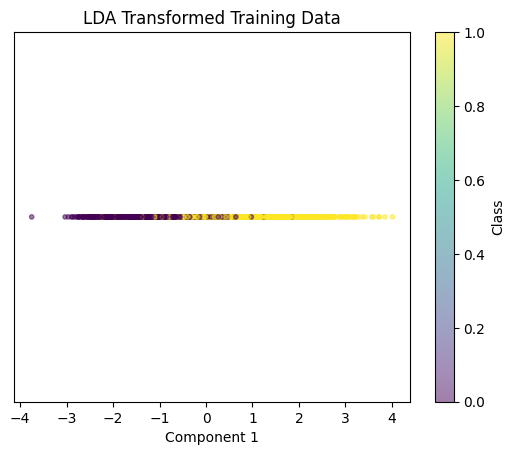

In [ ]:
# 1. Supervised Feature Reduction (LDA)
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Visualize LDA Transformed Training Data
plt.scatter(X_train_lda[:, 0], [0] * len(X_train_lda), c=y_train, cmap='viridis', s=10, alpha=0.5)
plt.title("LDA Transformed Training Data")
plt.xlabel("Component 1")
plt.yticks([])
plt.colorbar(label='Class')
plt.show()

In [ ]:
# 2. SVM Training with Hyperparameter Tuning
# Define SVM model
svm = SVC()

# Define hyperparameters to tune
param_grid = {
    'C': [0.1, 1, 10, 100],              # Regularization parameter
    'kernel': ['linear', 'rbf'],         # Kernel type
    'gamma': ['scale', 'auto', 0.1, 1]   # Kernel coefficient (for 'rbf')
}

# GridSearchCV for Original Features
grid_search_original = GridSearchCV(estimator=svm, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1)
grid_search_original.fit(X_train, y_train)

# GridSearchCV for LDA-Reduced Features
grid_search_lda = GridSearchCV(estimator=svm, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1)
grid_search_lda.fit(X_train_lda, y_train)

# Best parameters and accuracy
print("Best parameters (Original Features):", grid_search_original.best_params_)
print("Best accuracy (Original Features):", grid_search_original.best_score_)
print("Best parameters (LDA Features):", grid_search_lda.best_params_)
print("Best accuracy (LDA Features):", grid_search_lda.best_score_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters (Original Features): {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best accuracy (Original Features): 0.8704223408170776
Best parameters (LDA Features): {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Best accuracy (LDA Features): 0.8752208317997792


In [ ]:
# 3. Evaluate the Best Model on Test Data
# Original Features
best_svm_original = grid_search_original.best_estimator_
y_pred_original = best_svm_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)
f1_original = f1_score(y_test, y_pred_original)
precision_original = precision_score(y_test, y_pred_original)
recall_original = recall_score(y_test, y_pred_original)
print(f"Original Features - Accuracy: {accuracy_original:.4f}, F1: {f1_original:.4f}, Precision: {precision_original:.4f}, Recall: {recall_original:.4f}")

Original Features - Accuracy: 0.9080, F1: 0.9172, Precision: 0.9236, Recall: 0.9110


In [ ]:
# LDA-Reduced Features
best_svm_lda = grid_search_lda.best_estimator_
y_pred_lda = best_svm_lda.predict(X_test_lda)
accuracy_lda = accuracy_score(y_test, y_pred_lda)
f1_lda = f1_score(y_test, y_pred_lda)
precision_lda = precision_score(y_test, y_pred_lda)
recall_lda = recall_score(y_test, y_pred_lda)
print(f"LDA Features - Accuracy: {accuracy_lda:.4f}, F1: {f1_lda:.4f}, Precision: {precision_lda:.4f}, Recall: {recall_lda:.4f}")


LDA Features - Accuracy: 0.9119, F1: 0.9215, Precision: 0.9184, Recall: 0.9247


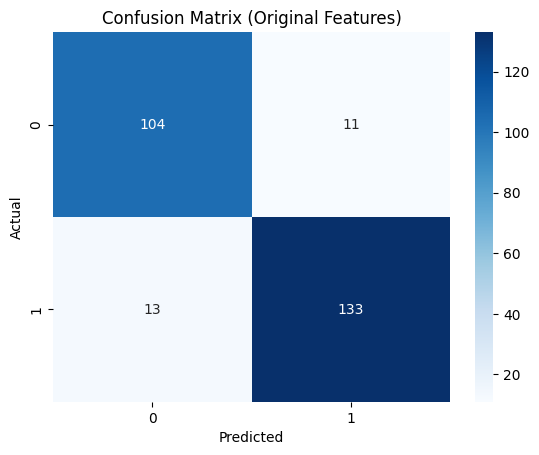

In [ ]:
# 4. Confusion Matrix for Both Models
# Original Features
cm_original = confusion_matrix(y_test, y_pred_original)
sns.heatmap(cm_original, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Original Features)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


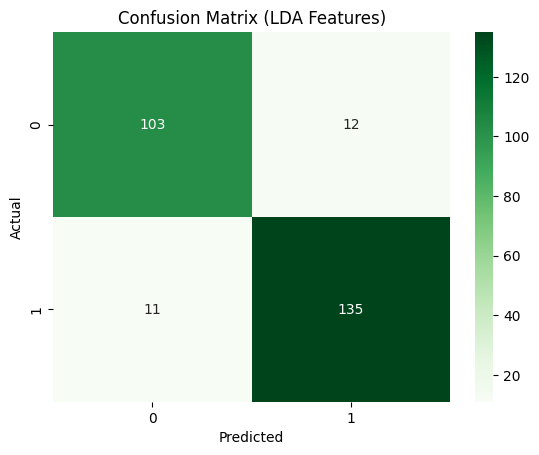

In [ ]:
# LDA Features
cm_lda = confusion_matrix(y_test, y_pred_lda)
sns.heatmap(cm_lda, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix (LDA Features)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

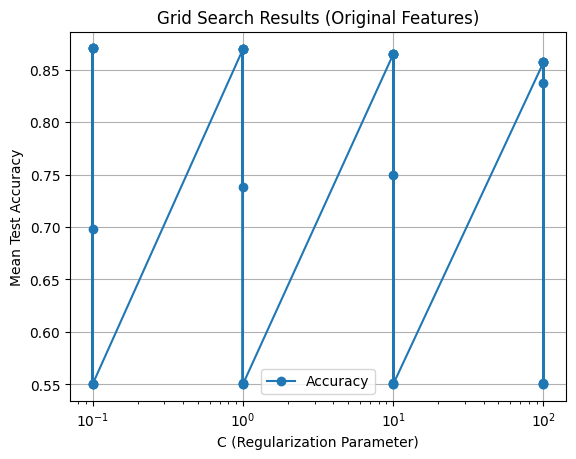

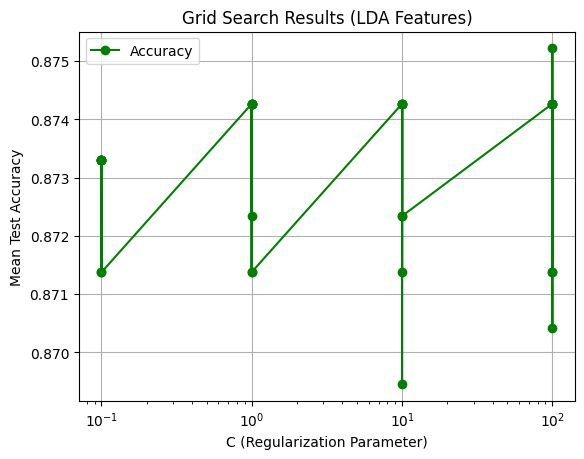

In [ ]:
# Visualize Grid Search Results for Original Features
results = pd.DataFrame(grid_search_original.cv_results_)
plt.plot(results['param_C'], results['mean_test_score'], label='Accuracy', marker='o')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Mean Test Accuracy')
plt.title('Grid Search Results (Original Features)')
plt.xscale('log')
plt.grid()
plt.legend()
plt.show()

# Visualize Grid Search Results for LDA Features
results_lda = pd.DataFrame(grid_search_lda.cv_results_)
plt.plot(results_lda['param_C'], results_lda['mean_test_score'], label='Accuracy', marker='o', color='green')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Mean Test Accuracy')
plt.title('Grid Search Results (LDA Features)')
plt.xscale('log')
plt.grid()
plt.legend()
plt.show()

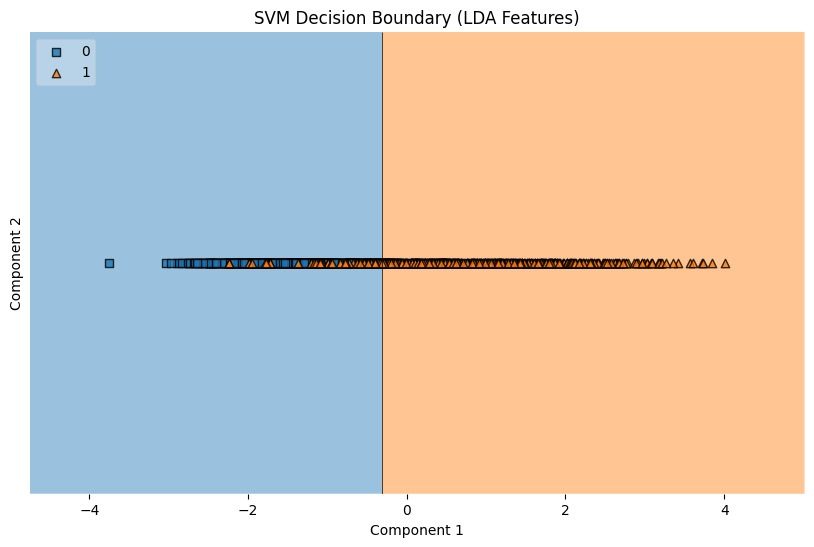

In [ ]:
# Extract best parameters for LDA features
best_params_lda = grid_search_lda.best_params_

# Scatter Plot with Decision Boundaries
from mlxtend.plotting import plot_decision_regions

# Train the SVM model with the best LDA parameters
lda_svm = SVC(C=best_params_lda['C'], kernel=best_params_lda['kernel'], gamma=best_params_lda['gamma'])
lda_svm.fit(X_train_lda, y_train)

# Plot decision boundaries
plt.figure(figsize=(10, 6))
plot_decision_regions(X_train_lda, y_train.values, clf=lda_svm, legend=2)
plt.title("SVM Decision Boundary (LDA Features)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

In [ ]:
# Create a summary table for metrics
metrics = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Original Features": [accuracy_original, precision_original, recall_original, f1_original],
    "LDA Features": [accuracy_lda, precision_lda, recall_lda, f1_lda],
}

df_metrics = pd.DataFrame(metrics)
print(df_metrics)
from tabulate import tabulate
print(tabulate(df_metrics, headers="keys", tablefmt="github"))

      Metric  Original Features  LDA Features
0   Accuracy           0.908046      0.911877
1  Precision           0.923611      0.918367
2     Recall           0.910959      0.924658
3   F1 Score           0.917241      0.921502
|    | Metric    |   Original Features |   LDA Features |
|----|-----------|---------------------|----------------|
|  0 | Accuracy  |            0.908046 |       0.911877 |
|  1 | Precision |            0.923611 |       0.918367 |
|  2 | Recall    |            0.910959 |       0.924658 |
|  3 | F1 Score  |            0.917241 |       0.921502 |
